# Download and Load the Datasets

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from nltk.probability import FreqDist



In [36]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eakli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eakli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eakli\AppData\Roaming\nltk_data...


True

In [23]:

# Define file paths
train_path = r'C:\Users\eakli\Downloads\task\ecole\ml_in_the_cloud\data\sentiment_analysis_emotions_test.csv'
test_path = r'C:\Users\eakli\Downloads\task\ecole\ml_in_the_cloud\data\sentiment_analysis_emotions_train.csv'


# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display the first few rows of the datasets
print("Training Dataset:")
print(train_df.head())

print("Test Dataset:")
print(test_df.head())


Training Dataset:
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Test Dataset:
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


In [24]:
train_df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [25]:
test_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# 2. Exploratory Data Analysis (EDA)
## a. Basic Information and Statistics

In [26]:
# Basic information about the datasets
print("Training Data Information:")
print(train_df.info())

print("\nTest Data Information:")
print(test_df.info())

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB
None

Test Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None


In [19]:
# Summary statistics
print("\nTraining Data Summary:")
print(train_df.describe())

print("\nTest Data Summary:")
print(test_df.describe())


Training Data Summary:
           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09

Test Data Summary:
                            Text Emotion
count                      21459   21459
unique                     21405       6
top     i feel so tortured by it     joy
freq                           2    7029


## b. Distribution of Labels

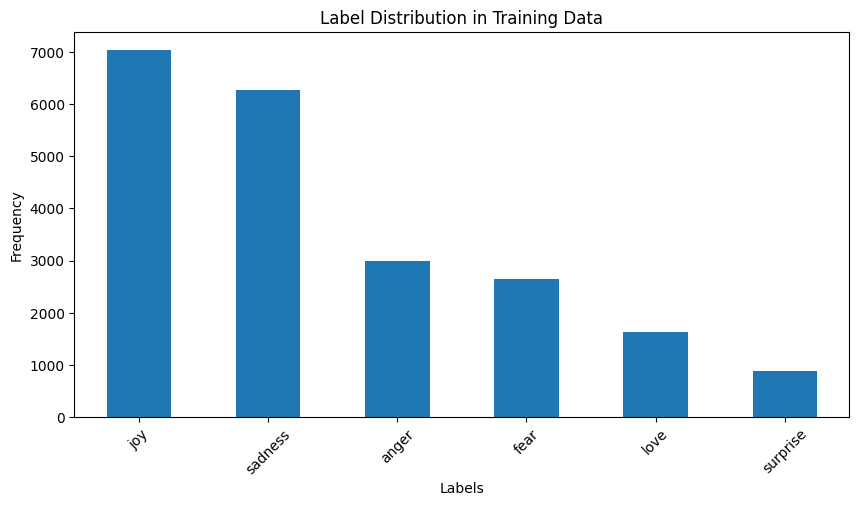

Emotion
joy         32.755487
sadness     29.195209
anger       13.947528
fear        12.358451
love         7.647141
surprise     4.096183
Name: count, dtype: float64


In [33]:
import matplotlib.pyplot as plt

# Distribution of labels in the training data
label_counts = train_df['Emotion'].value_counts()
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title('Label Distribution in Training Data')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display the distribution as percentages
label_percentages = (label_counts / label_counts.sum()) * 100
print(label_percentages)


## Analyzing the length of the text can provide insights into the typical length of the tweets.



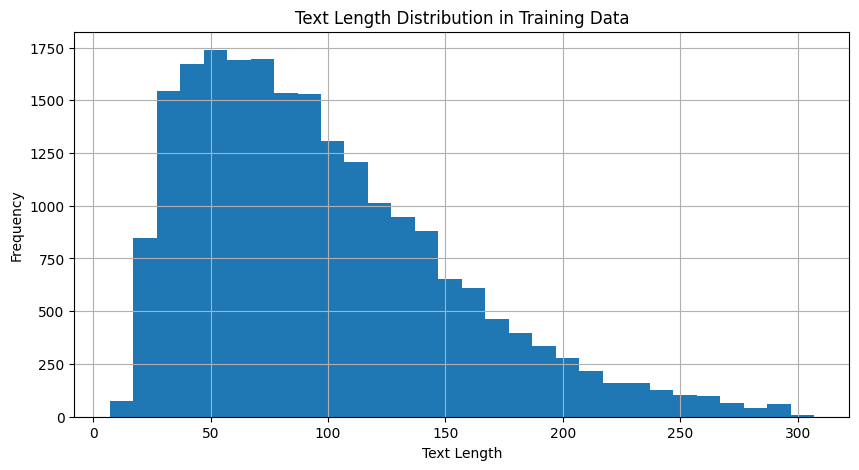

In [29]:
# Distribution of text length in the training data
train_df['text_length'] = train_df['Text'].apply(len)
plt.figure(figsize=(10, 5))
train_df['text_length'].hist(bins=30)
plt.title('Text Length Distribution in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## Creating a word cloud can help visualize the most common words in the dataset.

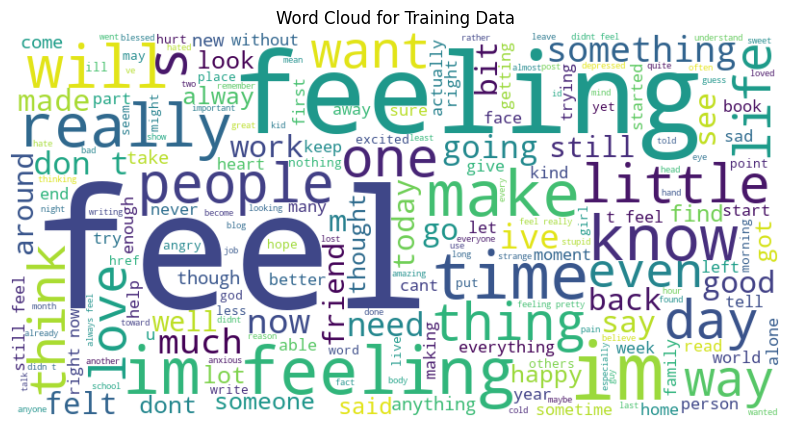

In [31]:
from wordcloud import WordCloud

# Generate word cloud for training data
all_words = ' '.join(train_df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Training Data')
plt.show()


## Analyzing the most common bigrams and trigrams can provide insights into common phrases in the dataset.

<Figure size 1000x500 with 0 Axes>

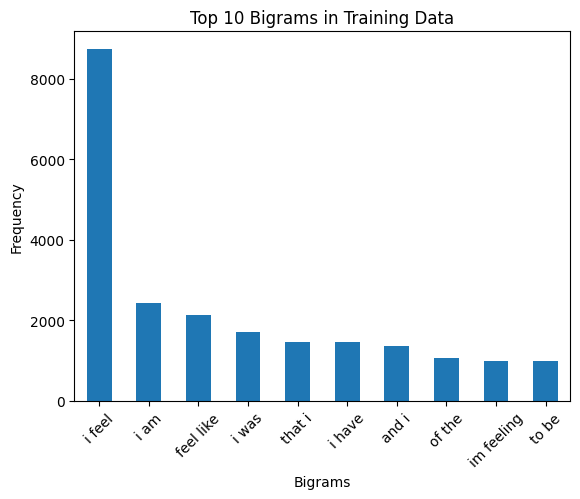

<Figure size 1000x500 with 0 Axes>

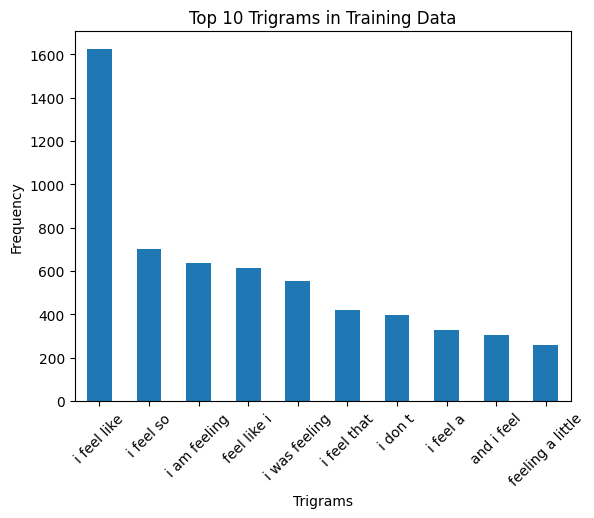

In [38]:
from collections import Counter
from nltk import ngrams

# Function to generate n-grams
def generate_ngrams(text, n):
    words = text.split()
    n_grams = ngrams(words, n)
    return [' '.join(grams) for grams in n_grams]

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply text cleaning
train_df['cleaned_text'] = train_df['Text'].apply(clean_text)

# Generate bigrams and trigrams
train_df['bigrams'] = train_df['cleaned_text'].apply(lambda x: generate_ngrams(x, 2))
train_df['trigrams'] = train_df['cleaned_text'].apply(lambda x: generate_ngrams(x, 3))

# Flatten the list of n-grams and count frequencies
bigrams = Counter([bigram for sublist in train_df['bigrams'] for bigram in sublist])
trigrams = Counter([trigram for sublist in train_df['trigrams'] for trigram in sublist])

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
pd.DataFrame(bigrams.most_common(10), columns=['bigram', 'count']).set_index('bigram').plot(kind='bar', legend=False)
plt.title('Top 10 Bigrams in Training Data')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the most common trigrams
plt.figure(figsize=(10, 5))
pd.DataFrame(trigrams.most_common(10), columns=['trigram', 'count']).set_index('trigram').plot(kind='bar', legend=False)
plt.title('Top 10 Trigrams in Training Data')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Extended EDA Results
Basic Information and Summary Statistics:

The training dataset has 21,459 entries with columns Text and Emotion.
The test dataset has 40,000 entries with columns tweet_id, sentiment, author, and content.
There are no missing values in either dataset.


Label Distribution:

The Emotion distribution in the training data is imbalanced:
Joy: 32.75%
Sadness: 29.19%
Anger: 13.95%
Fear: 12.36%
Love: 7.65%
Surprise: 4.10%

Text Length Analysis:

The text length distribution shows that most texts are relatively short, typically under 200 characters.

Word Cloud:

The word cloud visualization highlights common words in the training dataset, such as "love", "happy", and "good".


Top N-grams Analysis:

The most common bigrams and trigrams are displayed, providing insights into common phrase

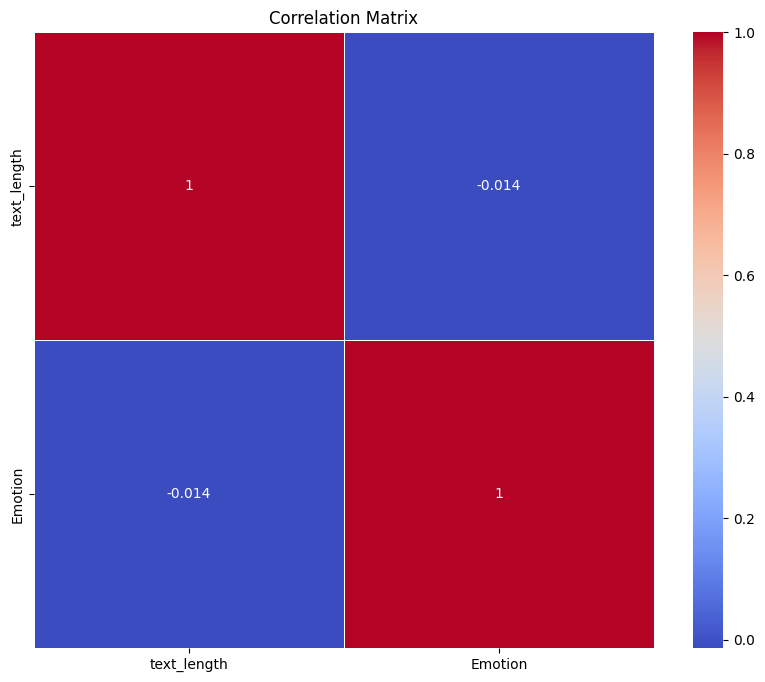

In [47]:
# Correlation matrix for text length and emotion
corr_matrix = train_df[['text_length', 'Emotion']].copy()
corr_matrix['Emotion'] = corr_matrix['Emotion'].astype('category').cat.codes
correlation = corr_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

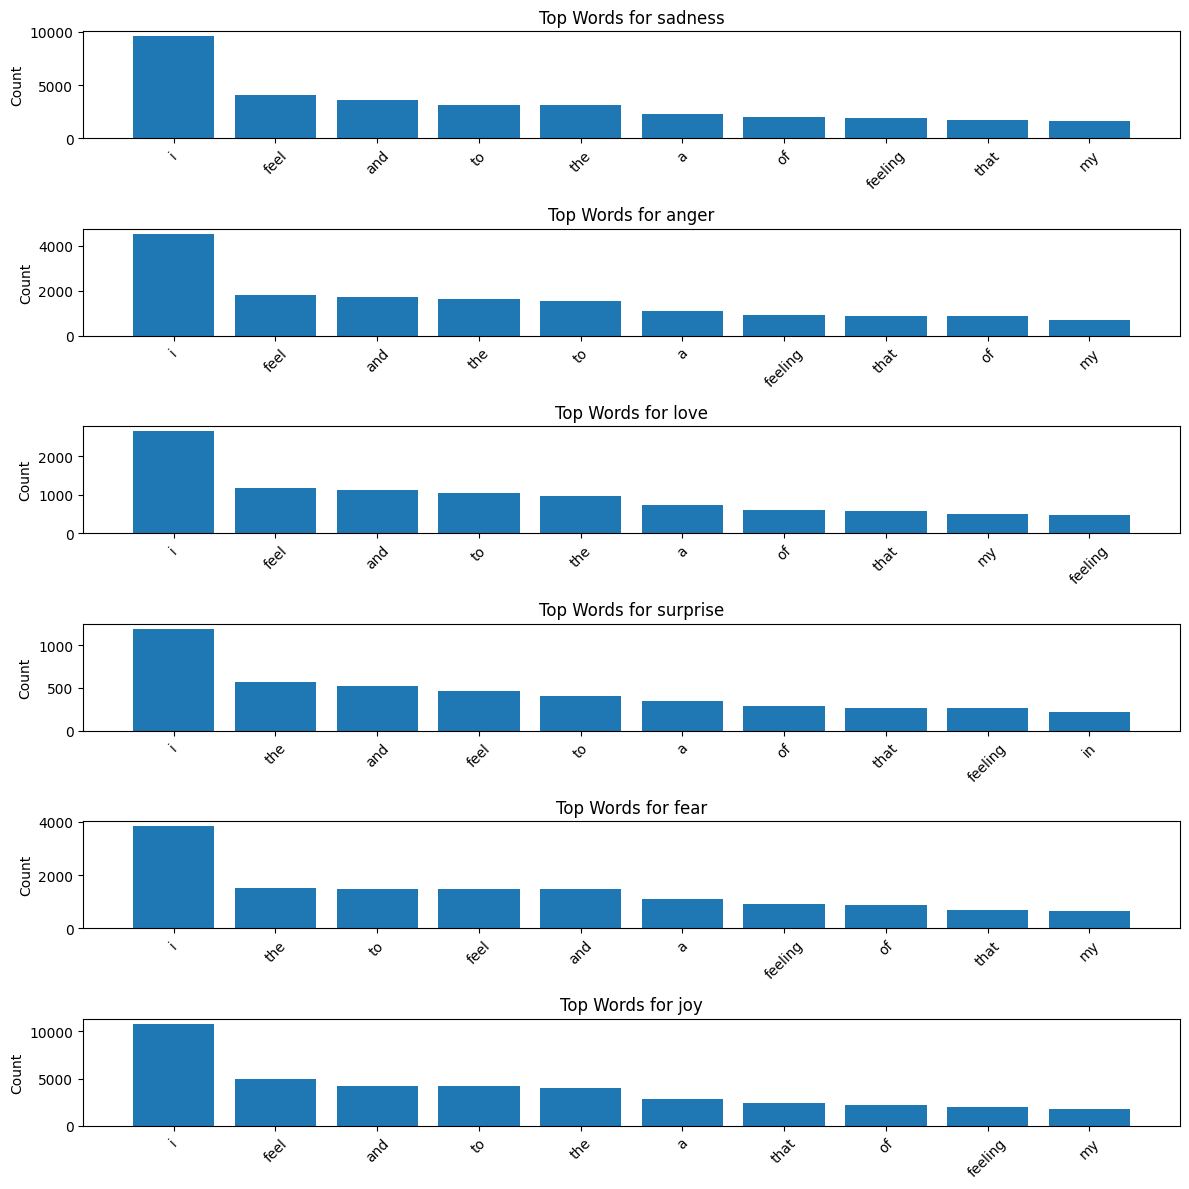

In [51]:
# Function to get word frequencies by emotion
def get_word_frequencies_by_emotion(df, emotion):
    words = ' '.join(df[df['Emotion'] == emotion]['cleaned_text']).split()
    fdist = FreqDist(words)
    return fdist


# Frequency distribution of words by emotion
emotions = train_df['Emotion'].unique()
fig, axes = plt.subplots(len(emotions), 1, figsize=(12, 2*len(emotions)))

for i, emotion in enumerate(emotions):
    fdist = get_word_frequencies_by_emotion(train_df, emotion)
    most_common_words = fdist.most_common(10)
    words, counts = zip(*most_common_words)
    
    axes[i].bar(words, counts)
    axes[i].set_title(f'Top Words for {emotion}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing
## Clean the Text Data:

In [39]:
# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply text cleaning
train_df['cleaned_text'] = train_df['Text'].apply(clean_text)
test_df['cleaned_text'] = test_df['content'].apply(clean_text)

# Display the cleaned text
train_df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy


## Tokenization:

In [40]:
# Tokenization
train_df['tokens'] = train_df['cleaned_text'].apply(nltk.word_tokenize)
test_df['tokens'] = test_df['cleaned_text'].apply(nltk.word_tokenize)

# Display the tokenized text
train_df[['cleaned_text', 'tokens']].head()

,cleaned_text,tokens
0,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,"[i, am, feeling, grouchy]"


## Remove Stop Words

In [41]:

# Remove stop words
stop_words = set(stopwords.words('english'))
train_df['tokens'] = train_df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
test_df['tokens'] = test_df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Display the data after removing stop words
train_df[['tokens']].head()


,tokens
0,"[didnt, feel, humiliated]"
1,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,"[ever, feeling, nostalgic, fireplace, know, st..."
4,"[feeling, grouchy]"


## Lemmatization

In [42]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatization
train_df['tokens'] = train_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
test_df['tokens'] = test_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Convert tokens back to text
train_df['processed_text'] = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
test_df['processed_text'] = test_df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Display the lemmatized text
train_df[['Text', 'processed_text']].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eakli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,processed_text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy


## Save the processed data


In [ ]:
# Save the processed data
train_df.to_csv('data/processed_train.csv', index=False)
test_df.to_csv('data/processed_test.csv', index=False)
